In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
#import data
players=pd.read_csv('res/Players.csv', dtype='unicode')
Seasons=pd.read_csv('res/Seasons_Stats.csv', dtype='unicode')
#clean data
players['college'] = players['collage']
players.drop('collage', axis=1, inplace=True)
players.drop('Unnamed: 0', axis=1, inplace=True)
Seasons=Seasons[Seasons['Player'] !=0]
Seasons['Age'] = Seasons['Age'].apply(pd.to_numeric)
Seasons.drop('Unnamed: 0', axis=1,inplace=True)
Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB','WS','PER','BPM','VORP']] = Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB','WS','PER','BPM','VORP']].apply(pd.to_numeric)
Seasons = Seasons.rename(index=str, columns={"PTS": "points", "Pos": "position", "Tm": "team", "G": "games", "GS": "games_started",
                                        "MP": "minutes_played", "BLK": "blocks", "TOV": "turnovers", "PF": "personal_fouls",
                                        "AST": "assists", "STL": "steals", "DRB": "defensive_rebounds", "ORB": "offensive_rebounds",
                                  "TRB": "total_rebounds", "WS": "win_shares"})
Seasons.head()
#players.dropna(how='all',inplace=True)
#players.set_index('Player',inplace=True)

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,FT%,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27,59.0


In [224]:
# fix height and weight
players[['height','weight']] = players[['height','weight']].apply(pd.to_numeric)
players['height'] = players['height'] * 0.0328084 # cm -> ft
players['weight'] = players['weight'] * 2.20462 # kg -> lb

In [225]:
#players['pos'] = players.Player.apply(lambda x: Seasons.Pos[Seasons.Player == x].values[0])
Seasons['height'] = Seasons.Player.apply(lambda x: players.height[players.Player == x].values)
Seasons['weight'] = Seasons.Player.apply(lambda x: players.weight[players.Player == x].values)
Seasons['college'] = Seasons.Player.apply(lambda x: players.college[players.Player == x].values)
Seasons['born'] = Seasons.Player.apply(lambda x: players.born[players.Player == x].values)
Seasons['birth_city'] = Seasons.Player.apply(lambda x: players.birth_city[players.Player == x].values)
Seasons['birth_state'] = Seasons.Player.apply(lambda x: players.birth_state[players.Player == x].values)
Seasons.head()

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,blocks,turnovers,personal_fouls,points,height,weight,college,born,birth_city,birth_state
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,217,458.0,[5.905512],[169.75574],[Indiana University],[1918],[nan],[nan]
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,99,279.0,[6.1679792],[182.98346],[University of Kentucky],[1921],[Yorktown],[Indiana]
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,192,438.0,[6.3320212],[189.59732],[University of Notre Dame],[1924],[nan],[nan]
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,29,63.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,27,59.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]


In [226]:
Seasons['height'] = Seasons['height'].str.get(0)
Seasons['weight'] = Seasons['weight'].str.get(0)
Seasons['college'] = Seasons['college'].str.get(0)
Seasons['born'] = Seasons['born'].str.get(0)
Seasons['birth_city'] = Seasons['birth_city'].str.get(0)
Seasons['birth_state'] = Seasons['birth_state'].str.get(0)

In [227]:
Seasons['hall_of_fame'] = 0
Seasons.loc[Seasons['Player'].str.contains("\*", na=False), 'hall_of_fame'] = 1
Seasons['hall_of_fame'].apply(pd.to_numeric)
Seasons['Player'] = Seasons['Player'].str.replace("\*", "")

In [228]:
Seasons.columns.values

array(['Year', 'Player', 'position', 'Age', 'team', 'games',
       'games_started', 'minutes_played', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'win_shares', 'WS/48', 'blank2', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'personal_fouls', 'points', 'height',
       'weight', 'college', 'born', 'birth_city', 'birth_state',
       'hall_of_fame'], dtype=object)

In [229]:
#add columns for per game stats
Seasons['ppg'] = Seasons.points/Seasons.games
Seasons['spg'] = Seasons.steals/Seasons.games
Seasons['apg'] = Seasons.assists/Seasons.games
Seasons['orpg'] = Seasons.offensive_rebounds/Seasons.games
Seasons['drpg'] = Seasons.defensive_rebounds/Seasons.games
Seasons['rpg'] = Seasons.total_rebounds/Seasons.games
Seasons['bpg'] = Seasons['blocks']/Seasons.games

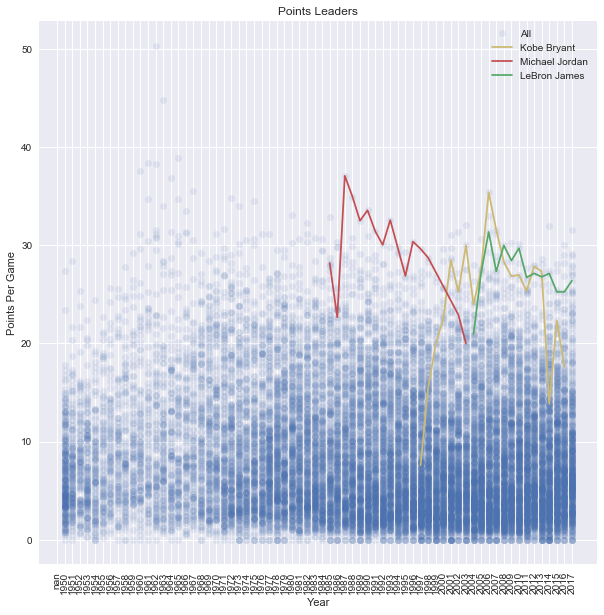

In [230]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['ppg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.ppg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.ppg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.ppg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.title('Points Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [231]:
basic_info = Seasons[['Player', 'games', 'points', 'assists', 'total_rebounds', 'blocks', 'steals', 'hall_of_fame',
                     'win_shares', 'PER', 'VORP', 'BPM']]
basic_info.head()

,Player,games,points,assists,total_rebounds,blocks,steals,hall_of_fame,win_shares,PER,VORP,BPM
0,Curly Armstrong,63.0,458.0,176.0,NaN,NaN,NaN,0,3.5,NaN,NaN,NaN
1,Cliff Barker,49.0,279.0,109.0,NaN,NaN,NaN,0,2.2,NaN,NaN,NaN
2,Leo Barnhorst,67.0,438.0,140.0,NaN,NaN,NaN,0,3.6,NaN,NaN,NaN
3,Ed Bartels,15.0,63.0,20.0,NaN,NaN,NaN,0,-0.6,NaN,NaN,NaN
4,Ed Bartels,13.0,59.0,20.0,NaN,NaN,NaN,0,-0.6,NaN,NaN,NaN


In [232]:
career = basic_info.groupby('Player').agg('sum')
career['ppg'] = career.points/career.games
career['spg'] = career.steals/career.games
career['apg'] = career.assists/career.games
career['rpg'] = career.total_rebounds/career.games
career['bpg'] = career['blocks']/career.games
career['PER'].head()

Player
A.C. Green       249.7
A.J. Bramlett     -0.4
A.J. English      23.1
A.J. Guyton       13.1
A.J. Hammons       8.4
Name: PER, dtype: float64

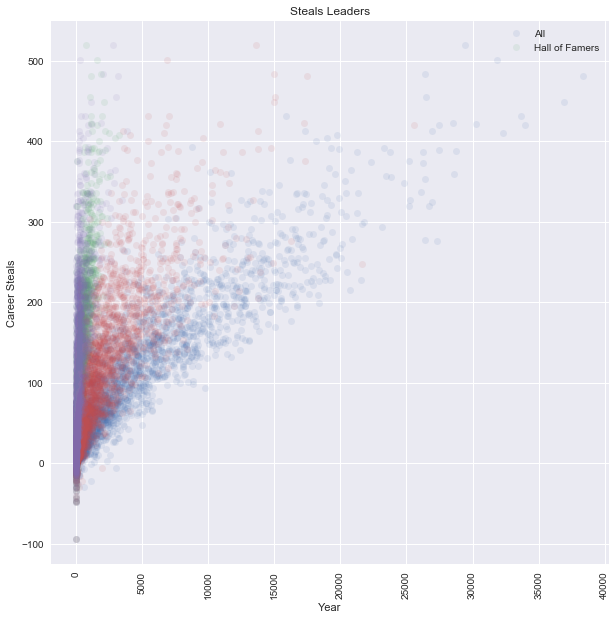

In [233]:
plt.figure(figsize = (10,10))
plt.plot(career['points'],career['PER'],'o', alpha = 0.1)
plt.plot(career['steals'],career['PER'],'o', alpha = 0.1)
plt.plot(career['total_rebounds'],career['PER'],'o', alpha = 0.1)
plt.plot(career['blocks'],career['PER'],'o', alpha = 0.1)
#plt.plot(career['assists'],career['PER'],'o', alpha = 0.1)
plt.legend(['All','Hall of Famers'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Career Steals')
plt.title('Steals Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [234]:
Seasons['PER'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: PER, dtype: float64

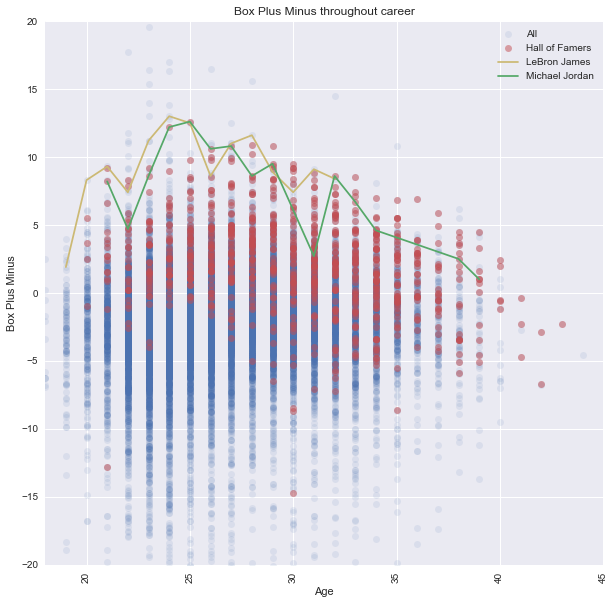

In [235]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['BPM'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.BPM[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.BPM[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.BPM[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Box Plus Minus')
plt.title('Box Plus Minus throughout career')
plt.axis([18, 45, -20, 20])
plt.xticks(rotation='vertical')
plt.show()

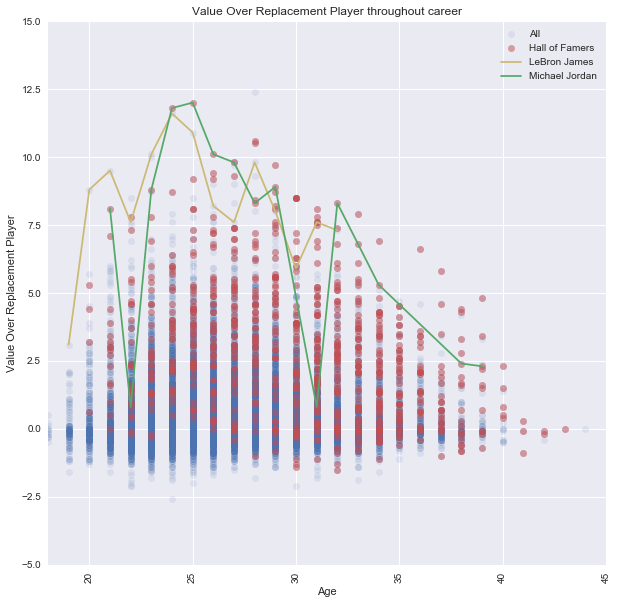

In [236]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['VORP'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.VORP[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.VORP[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.VORP[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Value Over Replacement Player')
plt.title('Value Over Replacement Player throughout career')
plt.axis([18, 45, -5, 15])
plt.xticks(rotation='vertical')
plt.show()

In [237]:
Seasons['rating_per_game'] = Seasons['ppg'] + 1.5*Seasons['apg'] + 1.2*Seasons['rpg'] + 3*Seasons['spg'] + 3*Seasons['bpg']

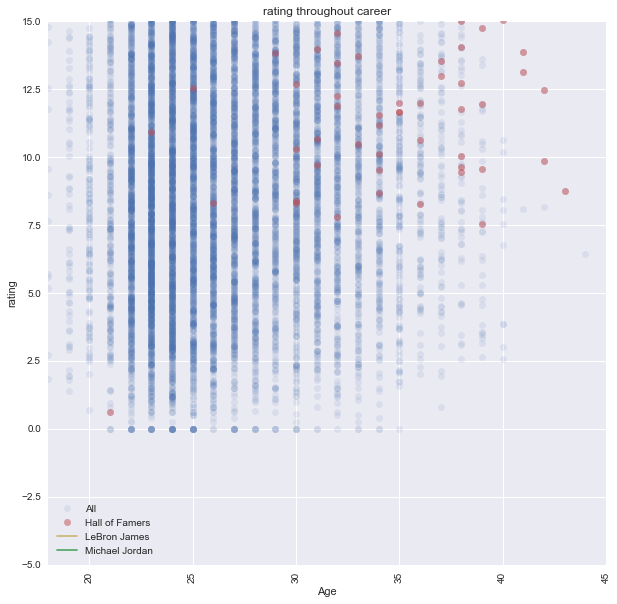

In [238]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['rating_per_game'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.rating_per_game[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.rating_per_game[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.rating_per_game[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('rating')
plt.title('rating throughout career')
plt.axis([18, 45, -5, 15])
plt.xticks(rotation='vertical')
plt.show()

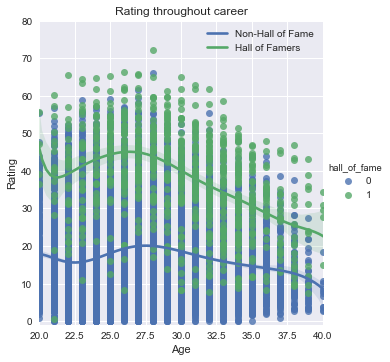

In [239]:
sns.lmplot(x='Age', y='rating_per_game', data=Seasons, order=10, hue='hall_of_fame')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Rating throughout career')
plt.legend(['Non-Hall of Fame','Hall of Famers'], fontsize = 10)
plt.axis([20, 40, -1, 80])
plt.show()

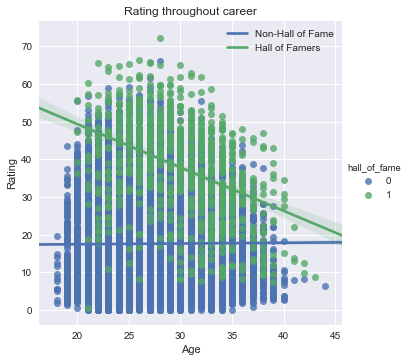

In [240]:
sns.lmplot(x='Age', y='rating_per_game', data=Seasons, order=1, hue='hall_of_fame')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Rating throughout career')
plt.legend(['Non-Hall of Fame','Hall of Famers'], fontsize = 10)
plt.show()

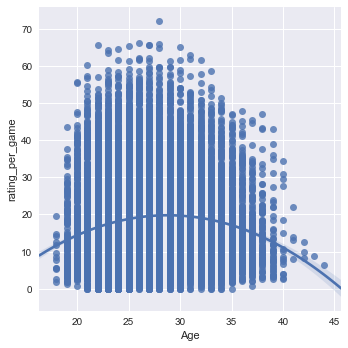

In [241]:
Seasons.loc[Seasons['Age'] < 25, 'young'] = 1
Seasons.loc[Seasons['Year'] < "2013", 'young'] = 0
sns.lmplot(x='Age', y='rating_per_game', data=Seasons, order=2)
plt.show()

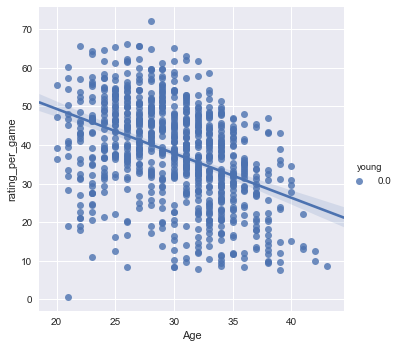

In [242]:
Seasons[['hall_of_fame']] = Seasons[['hall_of_fame']].apply(pd.to_numeric)
HOF = Seasons[Seasons['hall_of_fame'] == 1]
NHOF = Seasons[Seasons['hall_of_fame'] == 0]
sns.lmplot(x='Age', y='rating_per_game', data=HOF, hue='young')
plt.show()

In [243]:
import statsmodels.api as sm
sample = HOF[['Age', 'rating_per_game']].dropna()
X= sample['rating_per_game']
Y = sample['Age']
model = sm.OLS(Y,X)
estt = model.fit()
print(estt.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     4302.
Date:                Mon, 07 May 2018   Prob (F-statistic):               0.00
Time:                        18:05:21   Log-Likelihood:                -3243.1
No. Observations:                 828   AIC:                             6488.
Df Residuals:                     827   BIC:                             6493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rating_per_game     0.6923      0.011     

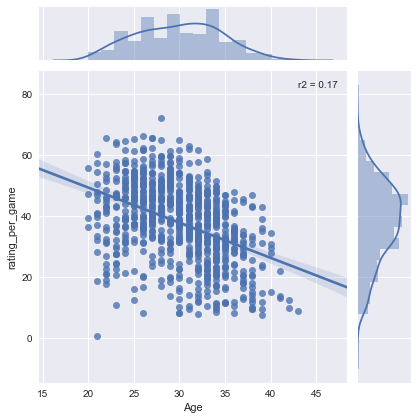

In [244]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(HOF['Age'], HOF['rating_per_game'], kind="reg", stat_func=r2)
plt.show()

In [245]:
Seasons['rating_per_game'] = Seasons['ppg'] + 1.5*Seasons['apg'] + 1.2*Seasons['rpg'] + 3*Seasons['spg'] + 3*Seasons['bpg']
Seasons.loc[Seasons['rating_per_game'] > 45, 'tier'] = 1
Seasons.loc[(Seasons['rating_per_game'] > 35) & (Seasons['rating_per_game'] <= 45), 'tier'] = 2
Seasons.loc[(Seasons['rating_per_game'] > 25) & (Seasons['rating_per_game'] <= 35), 'tier'] = 3
Seasons.loc[(Seasons['rating_per_game'] > 15) & (Seasons['rating_per_game'] <= 25), 'tier'] = 4
Seasons.loc[(Seasons['rating_per_game'] > 5) & (Seasons['rating_per_game'] <= 15), 'tier'] = 5
Seasons.loc[(Seasons['rating_per_game'] <= 5), 'tier'] = 6

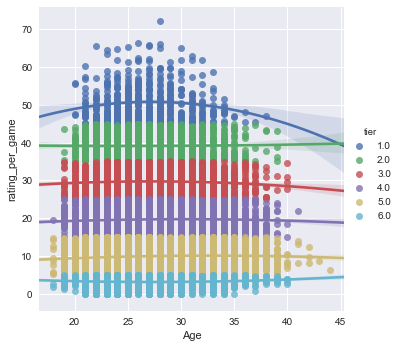

In [246]:
sns.lmplot(x='Age', y='rating_per_game', data=Seasons, order=2, hue='tier')
plt.show()

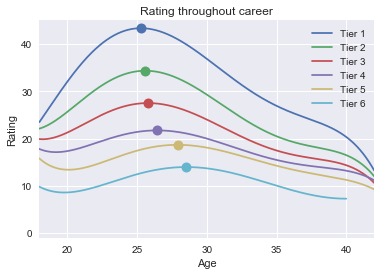

In [247]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)
set1 = set(Seasons.loc[Seasons['tier'] == 1]['Player'])
set2 = set(Seasons.loc[Seasons['tier'] == 2]['Player'])
set3 = set(Seasons.loc[Seasons['tier'] == 3]['Player'])
set4 = set(Seasons.loc[Seasons['tier'] == 4]['Player'])
set5 = set(Seasons.loc[Seasons['tier'] == 5]['Player'])
set6 = set(Seasons.loc[Seasons['tier'] == 6]['Player'])
t1 = Seasons.loc[Seasons['Player'].isin(set1)]
t2 = Seasons.loc[Seasons['Player'].isin(set2)]
t3 = Seasons.loc[Seasons['Player'].isin(set3)]
t4 = Seasons.loc[Seasons['Player'].isin(set4)]
t5 = Seasons.loc[Seasons['Player'].isin(set5)]
t6 = Seasons.loc[Seasons['Player'].isin(set6)]
tier1 = t1.loc[t1['Year'] > "1973"]
tier2 = t2.loc[t2['Year'] > "1973"]
tier3 = t3.loc[t3['Year'] > "1973"]
tier4 = t4.loc[t4['Year'] > "1973"]
tier5 = t5.loc[t5['Year'] > "1973"]
tier6 = t6.loc[t6['Year'] > "1973"]

elite = tier1
star = tier2.loc[~tier2['Player'].isin(tier1)]

great0 = tier3.loc[~tier3['Player'].isin(tier1)]
great = great0.loc[~great0['Player'].isin(tier2)]

good0 = tier4.loc[~tier4['Player'].isin(tier1)]
good1 = good0.loc[~good0['Player'].isin(tier2)]
good = good1.loc[~good1['Player'].isin(tier3)]

ok0 = tier5.loc[~tier5['Player'].isin(tier1)]
ok1 = ok0.loc[~ok0['Player'].isin(tier2)]
ok2 = ok1.loc[~ok1['Player'].isin(tier3)]
ok = ok2.loc[~ok2['Player'].isin(tier4)]

bad0 = tier6.loc[~tier6['Player'].isin(tier1)]
bad1 = bad0.loc[~bad0['Player'].isin(tier2)]
bad2 = bad1.loc[~bad1['Player'].isin(tier3)]
bad3 = bad2.loc[~bad2['Player'].isin(tier4)]
bad = bad3.loc[~bad3['Player'].isin(tier5)]

x0 = np.array(elite['Age'])
y0 = np.array(elite['rating_per_game'])
x1 = np.array(star['Age'])
y1 = np.array(star['rating_per_game'])
x2 = np.array(great['Age'])
y2 = np.array(great['rating_per_game'])
x3 = np.array(good['Age'])
y3 = np.array(good['rating_per_game'])
x4 = np.array(ok['Age'])
y4 = np.array(ok['rating_per_game'])
x5 = np.array(bad['Age'])
y5 = np.array(bad['rating_per_game'])
import numpy.polynomial.polynomial as poly
generic = np.linspace(18, 40, num=23)
x0_new = np.linspace(x0.min(), x0.max(), num=len(x0)*10)
x1_new = np.linspace(x1.min(), x1.max(), num=len(x1)*10)
x2_new = np.linspace(x2.min(), x2.max(), num=len(x2)*10)
x3_new = np.linspace(x3.min(), x3.max(), num=len(x3)*10)
x4_new = np.linspace(x4.min(), x4.max(), num=len(x4)*10)
x5_new = np.linspace(x5.min(), x5.max(), num=len(x5)*10)
coefs = poly.polyfit(x0, y0, 5)
ffit1 = poly.polyval(x0_new, coefs)
pred1 = poly.polyval(generic, coefs)
coefs = poly.polyfit(x1, y1, 5)
ffit2 = poly.polyval(x1_new, coefs)
pred2 = poly.polyval(generic, coefs)
coefs = poly.polyfit(x2, y2, 5)
ffit3 = poly.polyval(x2_new, coefs)
pred3 = poly.polyval(generic, coefs)
coefs = poly.polyfit(x3, y3, 5)
ffit4 = poly.polyval(x3_new, coefs)
pred4 = poly.polyval(generic, coefs)
coefs = poly.polyfit(x4, y4, 5)
ffit5 = poly.polyval(x4_new, coefs)
pred5 = poly.polyval(generic, coefs)
coefs = poly.polyfit(x5, y5, 5)
ffit6 = poly.polyval(x5_new, coefs)
pred6 = poly.polyval(generic, coefs)
plt.plot(x0_new, ffit1)
plt.plot(x1_new, ffit2)
plt.plot(x2_new, ffit3)
plt.plot(x3_new, ffit4)
plt.plot(x4_new, ffit5)
plt.plot(x5_new, ffit6)
max1x = x0_new[np.where(ffit1 == (max(ffit1)))]
max1y = max(ffit1)
plt.plot(max1x, max1y, 'o', markersize=10)
max2x = x1_new[np.where(ffit2 == (max(ffit2)))]
max2y = max(ffit2)
plt.plot(max2x, max2y, 'o', markersize=10)
max3x = x2_new[np.where(ffit3 == (max(ffit3)))]
max3y = max(ffit3)
plt.plot(max3x, max3y, 'o', markersize=10)
max4x = x3_new[np.where(ffit4 == (max(ffit4)))]
max4y = max(ffit4)
plt.plot(max4x, max4y, 'o', markersize=10)
max5x = x4_new[np.where(ffit5 == (max(ffit5)))]
max5y = max(ffit5)
plt.plot(max5x, max5y, 'o', markersize=10)
max6x = x5_new[np.where(ffit6 == (max(ffit6)))]
max6y = max(ffit6)
plt.plot(max6x, max6y, 'o', markersize=10)
plt.axis([18, 42, -1, 45])
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Rating throughout career')
plt.legend(['Tier 1','Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6'], fontsize = 10)
plt.show()

In [248]:
for i in range(18, 40):
    a = pred1[np.where(generic == i)]
    Seasons.loc[Seasons['Age'] == i, 'predict_1'] = a
    a = pred2[np.where(generic == i)]
    Seasons.loc[Seasons['Age'] == i, 'predict_2'] = a
    a = pred3[np.where(generic == i)]
    Seasons.loc[Seasons['Age'] == i, 'predict_3'] = a
    a = pred4[np.where(generic == i)]
    Seasons.loc[Seasons['Age'] == i, 'predict_4'] = a
    a = pred5[np.where(generic == i)]
    Seasons.loc[Seasons['Age'] == i, 'predict_5'] = a
    a = pred6[np.where(generic == i)]
    Seasons.loc[Seasons['Age'] == i, 'predict_6'] = a

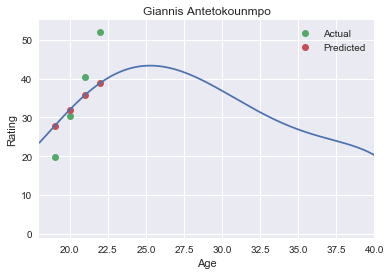

In [249]:
actual = young_guys.loc[young_guys['Player'] == 'Giannis Antetokounmpo', 'rating_per_game']
predict = young_guys.loc[young_guys['Player'] == 'Giannis Antetokounmpo', 'predict_1']
#err1 =    abs(young_guys['rating_per_game'] - young_guys['predict_1'])
#err2 =    abs(young_guys['rating_per_game'] - young_guys['predict_2'])
#err3 =    abs(young_guys['rating_per_game'] - young_guys['predict_3'])
#err4 =    abs(young_guys['rating_per_game'] - young_guys['predict_4'])
#err5 =    abs(young_guys['rating_per_game'] - young_guys['predict_5'])
#err6 =    abs(young_guys['rating_per_game'] - young_guys['predict_6'])
#young_guys['error'] = min(err1, err2, err3, err4, err5, err6)
plt.plot(19, actual[0], 'o', color='g')
plt.plot(19, predict[0], 'o',color='r')
plt.plot(20, actual[1], 'o',color='g')
plt.plot(20, predict[1], 'o', color='r')
plt.plot(21, actual[2], 'o', color='g')
plt.plot(21, predict[2], 'o',color='r')
plt.plot(22, actual[3], 'o', color='g')
plt.plot(22, predict[3], 'o',color='r')
plt.plot(x0_new, ffit1)
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Giannis Antetokounmpo')
plt.axis([18, 40, -1, 55])
plt.legend(['Actual','Predicted'], fontsize = 10)
plt.show()

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
bayes_seasons = Seasons
bayes_seasons = bayes_seasons[np.isfinite(bayes_seasons['rating_per_game'])]
#labels = bayes_seasons['tier']
#features = ['apg', 'ppg', 'bpg', 'spg', 'rpg']
labels = bayes_seasons['hall_of_fame']
features = ['rating_per_game']
X = bayes_seasons[features]
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [350]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.96173076923076928

In [351]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict))

,0,1
0,4944,47
1,152,57


In [303]:
bayes_seasons.head()


,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,bpg,rating_per_game,young,tier,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6
3851,1974,Zaid Abdul-Aziz,C,27.0,HOU,79.0,NaN,2459,15.9,0.516,...,1.316456,35.108861,0.0,2.0,42.290709,33.735330,27.161912,21.673701,18.546376,13.669728
3852,1974,Kareem Abdul-Jabbar,C,26.0,MIL,81.0,NaN,3548,24.4,0.564,...,3.493827,66.279012,0.0,1.0,43.150693,34.288946,27.490324,21.691197,18.129386,13.163663
3853,1974,Don Adams,SF,26.0,DET,74.0,NaN,2298,10.9,0.457,...,0.162162,25.325676,0.0,3.0,43.150693,34.288946,27.490324,21.691197,18.129386,13.163663
3854,1974,Rick Adelman,PG,27.0,CHI,55.0,NaN,618,10.0,0.447,...,0.018182,8.360000,0.0,5.0,42.290709,33.735330,27.161912,21.673701,18.546376,13.669728
3855,1974,Lucius Allen,PG,26.0,MIL,72.0,NaN,2388,18.8,0.536,...,0.305556,36.877778,0.0,2.0,43.150693,34.288946,27.490324,21.691197,18.129386,13.163663


In [ ]:
young_guys0 = Seasons.loc[Seasons['Age'] < 25, :]
young_guys = young_guys0.loc[young_guys0['Year'] > "2012", :]
young_guys.head()

In [ ]:
old_guys0 = Seasons.loc[Seasons['Year'] < "2013", :]
old_guys = old_guys0.loc[old_guys0['Year'] > "1973", :]
old_guys.head()

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['PER'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.PER[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.PER[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.PER[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating')
plt.title('Player Efficiency Rating throughout career')
plt.axis([18, 45, -20, 40])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
Seasons.loc[Seasons['Year']=="2010", :].head()

In [347]:
#decision tree classification
from sklearn.preprocessing import StandardScaler
features = ['rating_per_game']
classify_seasons = Seasons
classify_seasons = classify_seasons[np.isfinite(classify_seasons['rating_per_game'])]
X = classify_seasons[features]
y = classify_seasons['hall_of_fame']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.93980769230769234

In [348]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict))

,0,1
0,4830,161
1,152,57


In [ ]:
#career.loc[career.index == 'Wilt Chamberlain']
sns.distplot(career['assists'])
career.head()

In [ ]:
vorp = pd.DataFrame()
vorp['player'] = Seasons.groupby('Player').mean()['VORP'].player
vorp['vorp'] = Seasons.groupby('Player').mean()['VORP'].values
vorp.sort('vorp', ascending = False).head(10)

In [ ]:
Seasons[Seasons['Player'] == "Michael Jordan"]

In [ ]:
fig = plt.figure(figsize = (10,10))
x = Seasons.apg[(Seasons.position == 'PG')]
y = Seasons.bpg[(Seasons.position == 'PG')]
plt.plot(x, y, 'o', color='r', alpha=0.4)
#x = Seasons.apg[(Seasons.position == 'SG')]
#y = Seasons.bpg[(Seasons.position == 'SG')]
#plt.plot(x, y, 'o', color='b', alpha=0.3)
#x = Seasons.apg[(Seasons.position == 'SF')]
#y = Seasons.bpg[(Seasons.position == 'SF')]
#plt.plot(x, y, 'o', color='m', alpha=0.3)
x = Seasons.apg[(Seasons.position == 'C')]
y = Seasons.bpg[(Seasons.position == 'C')]
plt.plot(x, y, 'o', color='b', alpha=0.4)
plt.xlabel('Assists')
plt.ylabel('Blocks')
plt.axis([-0.2, 10, -0.1, 4])
plt.title('Blocks vs Assists')
plt.legend(['Point Guard','Center'], fontsize=20)
plt.show()